# Assignment 7: Exploring 3D Sinusoidal Data using Artificial Neural Networks
## DTSC 680: Applied Machine Learning

## Name: Kurtis Crowe

## Directions and Overview

The main purpose of this assignment is for you to gain experience using artificial neural networks to solve simple regression problems.  In this assignment, you will fit a neural network to a noisy 3D sinusoidal data set.  You will use a `Sequential` model that can be trained very quickly on the supplied data, so I want you to manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the reasonable hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

So, play around and build some models.  When you are done playing with hyperparameter values, you should finish by building an ANN that models the data reasonably well! You should be able to train a model and use it to predict a curve at least as good as mine, but your goal should be to obtain a smoother and less erratic curve.

(Side Note: Achieving a less erratic prediction curve could be done either by building a better model, ___OR___ by sorting the data more intelligently thereby plotting a prediction curve that looks better.  I propose the ideal line is created by sorting the data in such a way that the resulting line minimizes the arc length of the curve. You don't need to worry about any of this, however you do need to generate a figure with a descent-looking prediction curve superimposed on the data.)

Here just just a few of the hyperparameters you can play around with:

- number of nodes per layer
- number of layers
- activation functions
- normalization method (should be negligible)
- number of epochs
- learning rate
- loss function

You will know that you have obtained a reasonable model when the model's prediction curve looks reasonable.  ___Below you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline looks totally crazy and out-of-this-world when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with plotting the trendline from examining this new scatter plot of the model's predictions.  Your final submission, however, should contain a connected line plot.___  

Lastly in this assignment, you will compute the generalization error on the test set.

## Preliminaries

Let's import some common packages:

In [72]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(traindf):
    fig = plt.figure(figsize=(25, 25))
    
    # Plotting the training data
    def plot_subplot(ax, view_init):
        ax.scatter3D(traindf['x'], traindf['y'], traindf['z'], c='steelblue')
        ax.set_xlabel('X', color='maroon', labelpad=10)
        ax.set_ylabel('Y', color='maroon', labelpad=10)
        ax.set_zlabel('Z', color='maroon', labelpad=10)
        ax.view_init(*view_init)

        # Set lims
        ax.set_zlim(-1.5, 1.5)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)

        # Set ticks for x, y, z axes
        ax.set_zticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
        ax.set_xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
        ax.set_yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])

    ax1 = fig.add_subplot(221, projection='3d')
    plot_subplot(ax1, (0, 89))

    ax2 = fig.add_subplot(222, projection='3d')
    plot_subplot(ax2, (35, 0))

    ax3 = fig.add_subplot(223, projection='3d')
    plot_subplot(ax3, (40, 89))

    ax4 = fig.add_subplot(224, projection='3d')
    plot_subplot(ax4, (90, -90))

    plt.show()
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    # Creating the figure
    fig = plt.figure(figsize=(25, 25))

    # Subplot 1
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter3D(scat_x, scat_y, scat_z, c='steelblue')
    ax1.scatter3D(fit_x, fit_y, fit_z, color='black')  # Plotting the prediction curve
    ax1.set_xlabel('X', color='maroon', labelpad=10)
    ax1.set_ylabel('Y', color='maroon', labelpad=10)
    ax1.set_zlabel('Z', color='maroon', labelpad=10)
    ax1.view_init(0, 89)
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_zlim(-1.5, 1.5)
    ax1.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax1.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax1.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])

    # Subplot 2
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.scatter3D(scat_x, scat_y, scat_z, c='steelblue')
    ax2.scatter3D(fit_x, fit_y, fit_z, color='black')  # Plotting the prediction curve
    ax2.set_xlabel('X', color='maroon', labelpad=10)
    ax2.set_ylabel('Y', color='maroon', labelpad=10)
    ax2.set_zlabel('Z', color='maroon', labelpad=10)
    ax2.view_init(35, 0)
    ax2.set_xlim(-1.5, 1.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_zlim(-1.5, 1.5)
    ax2.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax2.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax2.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])

    # Subplot 3
    ax3 = fig.add_subplot(223, projection='3d')
    ax3.scatter3D(scat_x, scat_y, scat_z, c='steelblue')
    ax3.scatter3D(fit_x, fit_y, fit_z, color='black')  # Plotting the prediction curve
    ax3.set_xlabel('X', color='maroon', labelpad=10)
    ax3.set_ylabel('Y', color='maroon', labelpad=10)
    ax3.set_zlabel('Z', color='maroon', labelpad=10)
    ax3.view_init(40, 89)
    ax3.set_xlim(-1.5, 1.5)
    ax3.set_ylim(-1.5, 1.5)
    ax3.set_zlim(-1.5, 1.5)
    ax3.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax3.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax3.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])

    # Subplot 4
    ax4 = fig.add_subplot(224, projection='3d')
    ax4.scatter3D(scat_x, scat_y, scat_z, c='steelblue')
    ax4.scatter3D(fit_x, fit_y, fit_z, color='black')  # Plotting the prediction curve
    ax4.set_xlabel('X', color='maroon', labelpad=10)
    ax4.set_ylabel('Y', color='maroon', labelpad=10)
    ax4.set_zlabel('Z', color='maroon', labelpad=10)
    ax4.view_init(90, -90)
    ax4.set_xlim(-1.5, 1.5)
    ax4.set_ylim(-1.5, 1.5)
    ax4.set_zlim(-1.5, 1.5)
    ax4.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax4.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])
    ax4.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])

    plt.show()


# Import, Split and Standardize Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidalANN.csv`.  Name the returned DataFrame `data`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. Looking at the below graph, it makes sense for `x` and `z` to be your training data and `y` to be your response data.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

3. Next, use the `StandardScaler()` to scale your data.

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing data
data = pd.read_csv("3DSinusoidalANN.csv")

#Split the data
X_train, X_test, y_train, y_test = train_test_split(data[['x', 'z']], data['y'], test_size=0.2, random_state=42)


# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))


# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell. 

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

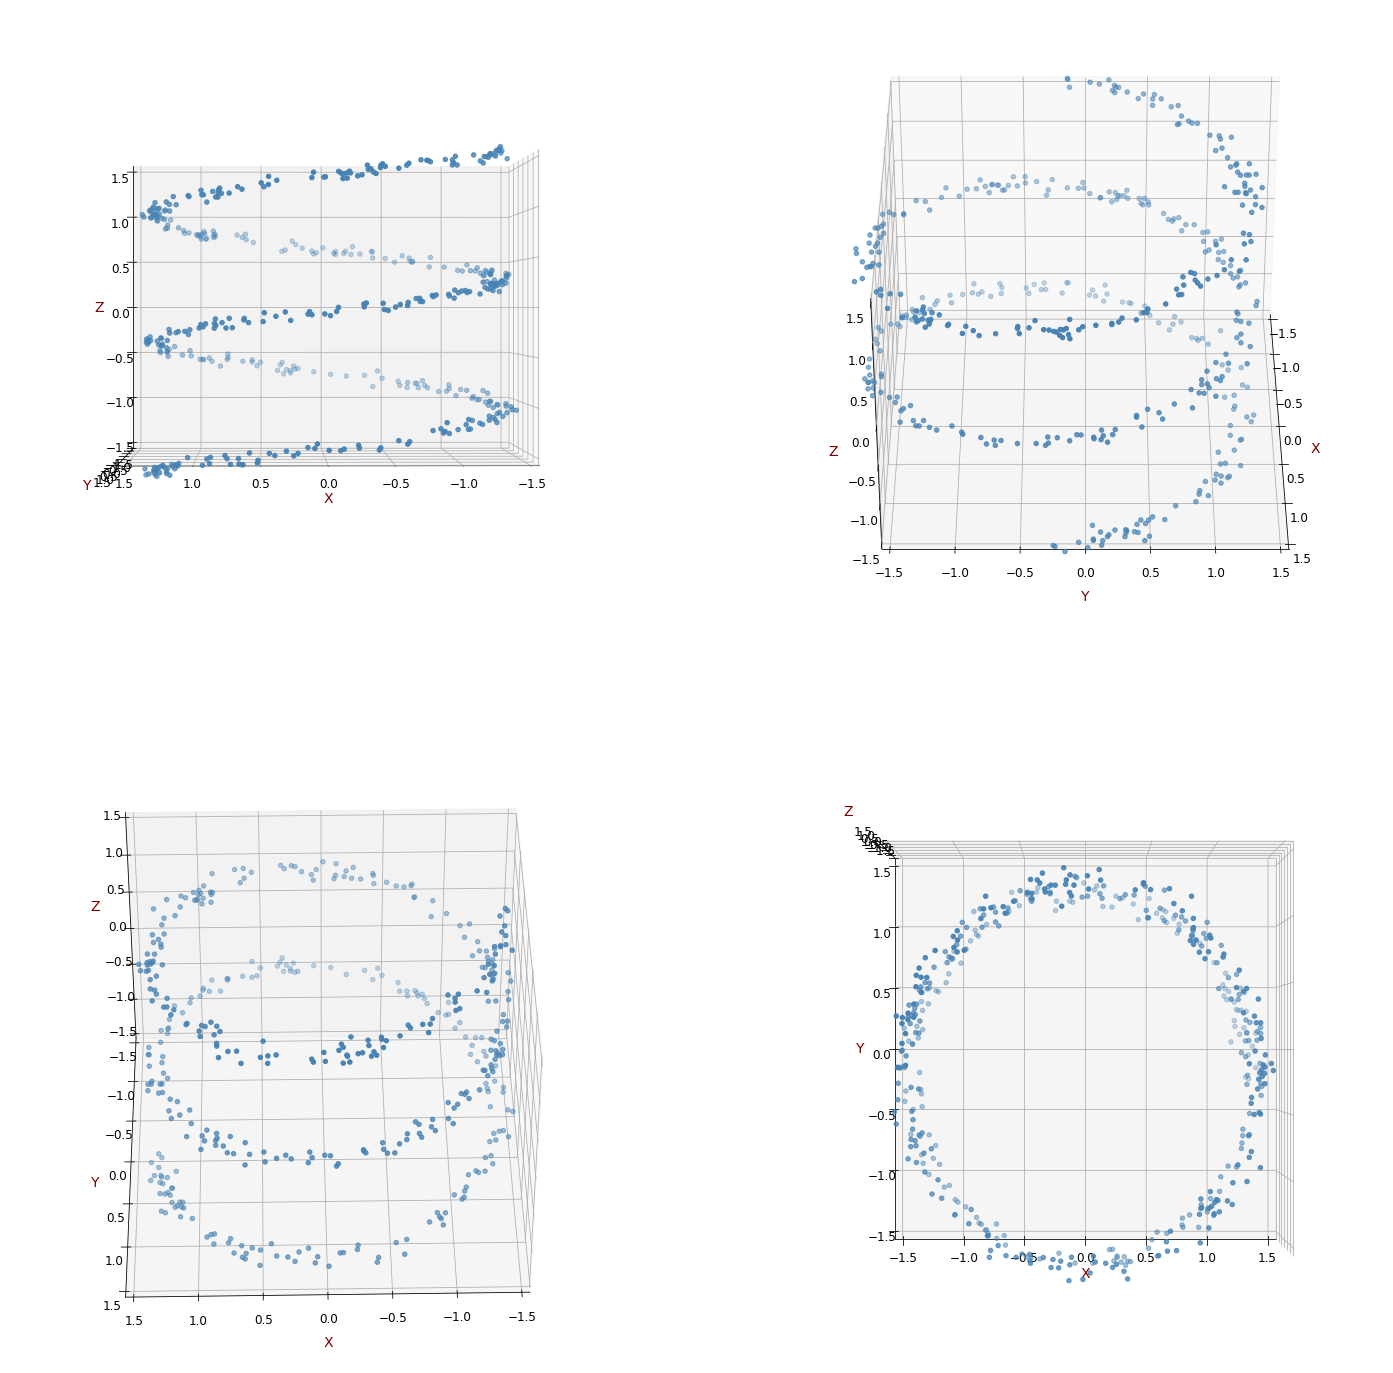

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Plotting the training data
fig = plt.figure(figsize=(25, 25))

ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter3D(X_train_scaled[:, 0], y_train_scaled[:, 0], X_train_scaled[:, 1], c='steelblue')
ax1.set_xlabel('X', color='maroon', labelpad=10)
ax1.set_ylabel('Y', color='maroon', labelpad=10)
ax1.set_zlabel('Z', color='maroon', labelpad=10)
ax1.view_init(0, 89)


# Set lims
ax1.set_zlim(-1.5, 1.5)
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)

# Set ticks for x, y, z axes
ax1.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax1.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax1.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])


####


# Creating subplot ax2
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter3D(X_train_scaled[:, 0], y_train_scaled[:, 0], X_train_scaled[:, 1], c='steelblue')
ax2.set_xlabel('X', color='maroon', labelpad=10)
ax2.set_ylabel('Y', color='maroon', labelpad=10)
ax2.set_zlabel('Z', color='maroon', labelpad=10)
ax2.view_init(35, 0)

# Set lims for ax2
ax2.set_zlim(-1.5, 1.5)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)

# Set ticks for x, y, z axes for ax2
ax2.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax2.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax2.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])


#####


# Creating subplot ax3
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter3D(X_train_scaled[:, 0], y_train_scaled[:, 0], X_train_scaled[:, 1], c='steelblue')
ax3.set_xlabel('X', color='maroon', labelpad=10)
ax3.set_ylabel('Y', color='maroon', labelpad=10)
ax3.set_zlabel('Z', color='maroon', labelpad=10)
ax3.view_init(40, 89)

# Set lims for ax3
ax3.set_zlim(-1.5, 1.5)
ax3.set_xlim(-1.5, 1.5)
ax3.set_ylim(-1.5, 1.5)

# Set ticks for x, y, z axes for ax3
ax3.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax3.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax3.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])

######


# Creating subplot ax4
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter3D(X_train_scaled[:, 0], y_train_scaled[:, 0], X_train_scaled[:, 1], c='steelblue')
ax4.set_xlabel('X', color='maroon', labelpad=10)
ax4.set_ylabel('Y', color='maroon', labelpad=10)
ax4.set_zlabel('Z', color='maroon', labelpad=10)
ax4.view_init(90, -90)

# Set lims for ax4
ax4.set_zlim(-1.5, 1.5)
ax4.set_xlim(-1.5, 1.5)
ax4.set_ylim(-1.5, 1.5)

# Set ticks for x, y, z axes for ax4
ax4.set_zticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax4.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax4.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])




plt.show()


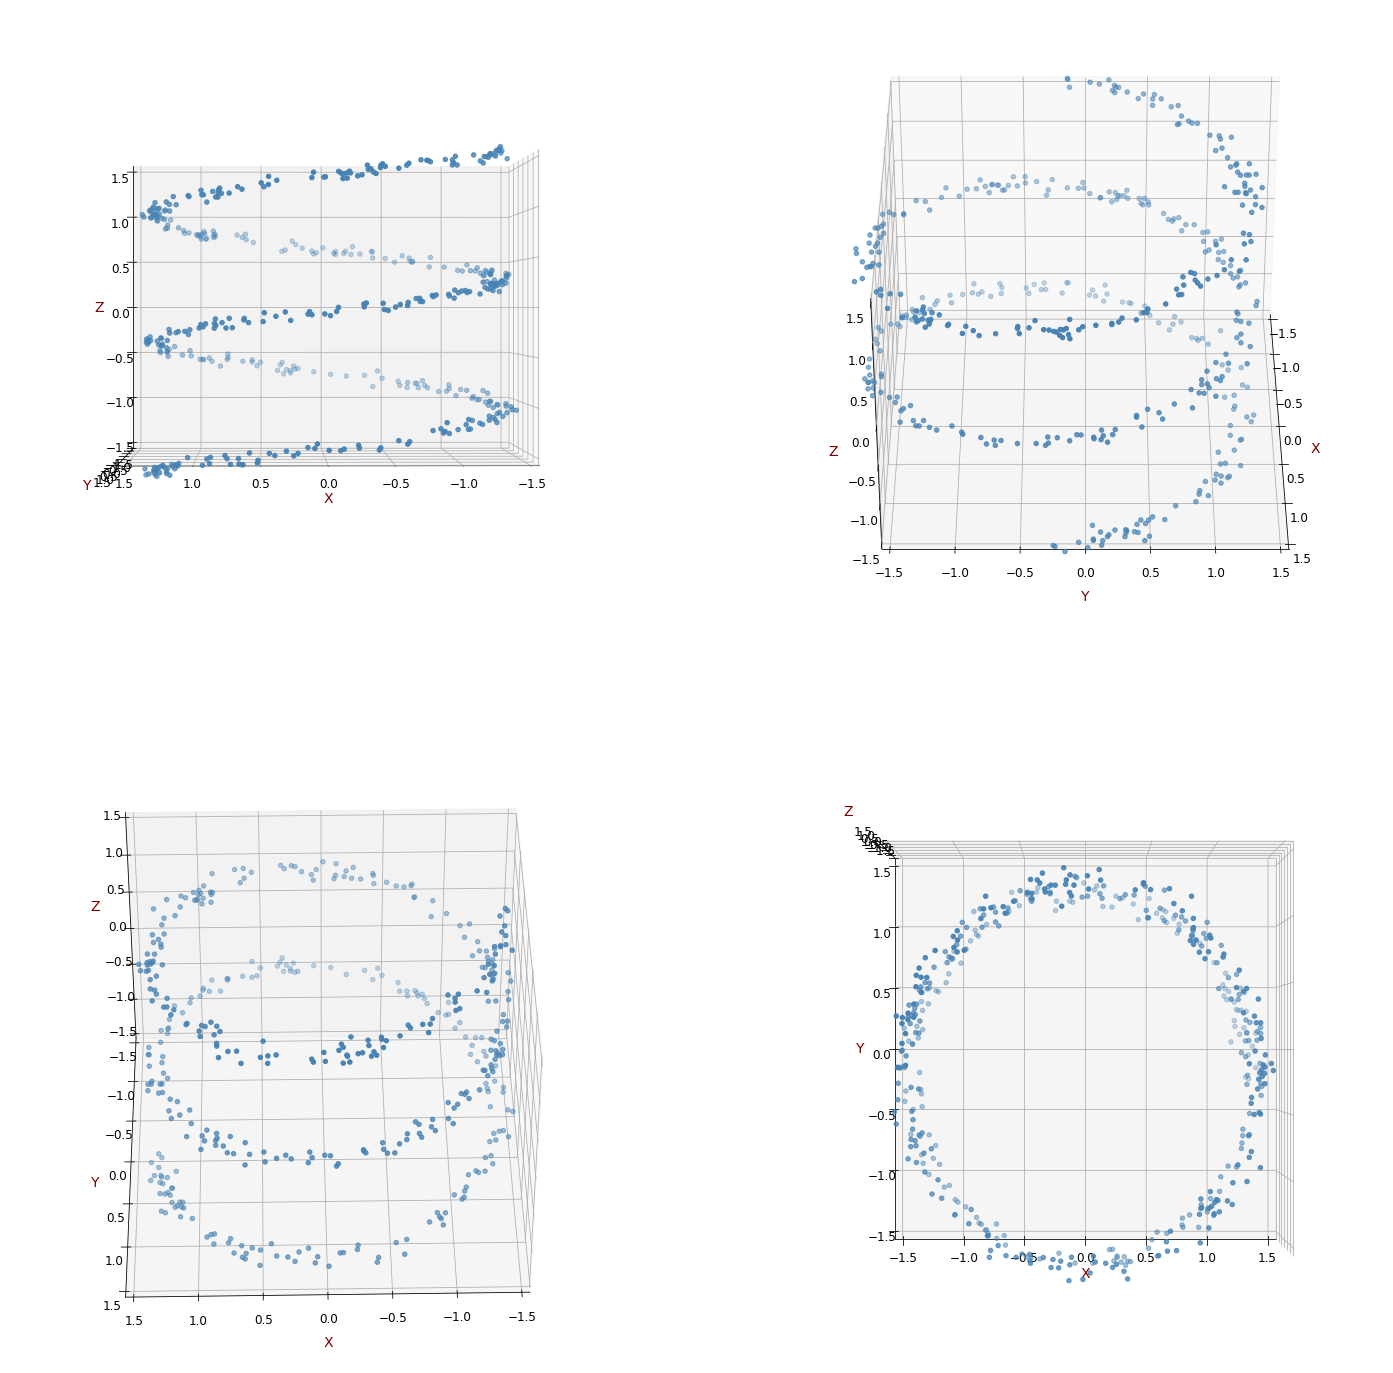

In [5]:
#creating dataframe that takes x, y, z assigned to train_df

train_df = pd.DataFrame({'x': X_train_scaled[:, 0], 'y': y_train_scaled[:, 0], 'z': X_train_scaled[:, 1]})

#calling function with dataframe
plot3Ddata(train_df)

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays.  The three Numpy arrays called `fit_x, fit_y,` and  `fit_z` represent the x, y, and z coordinates of the model predictions (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)  You will use the `plotscatter3Ddata()` function in the following section.

# Explore 3D Sinusoidal Data with Artifical Neural Networks

Fit a `Sequential` model to this data.  You must manually assign values to the hyperparameters, including the number of nuerons per layer and the number of layers.  You should "play around" by using different combinations of hyperparameter values.  When you are done playing, you should build an ANN that models the data well.  Then, you will use that modelto calculate the generalization error in the subsequent section.

In [73]:
import keras
import tensorflow
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras import regularizers

#Define model 
model = Sequential()
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation="relu", input_shape=[2,])), Dropout(0.2)
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Define early stopping callback and adjust tolerance
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Fit 
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
12/12 [==============================] - 1s 12ms/step - loss: 0.9762 - val_loss: 0.8941
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9101 - val_loss: 0.8728
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8688 - val_loss: 0.8393
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8338 - val_loss: 0.8075
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8001 - val_loss: 0.7823
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7473 - val_loss: 0.7358
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6935 - val_loss: 0.7011
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6349 - val_loss: 0.6089
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5589 - val_loss: 0.5252
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4996 - val_loss: 0.4663
Epoch 11

### Plot Model Predictions for Training Set

Use the model's `predict()` method to make a prediction for `y` using the `x` and `z` training data.  Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [74]:
y_pred_scaled = model.predict(X_train_scaled)

14/14 [==============================] - 0s 878us/step


`fit_x, fit_y,` and  `fit_z` represent the x, y, and z coordinates of the model predictions (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data. 

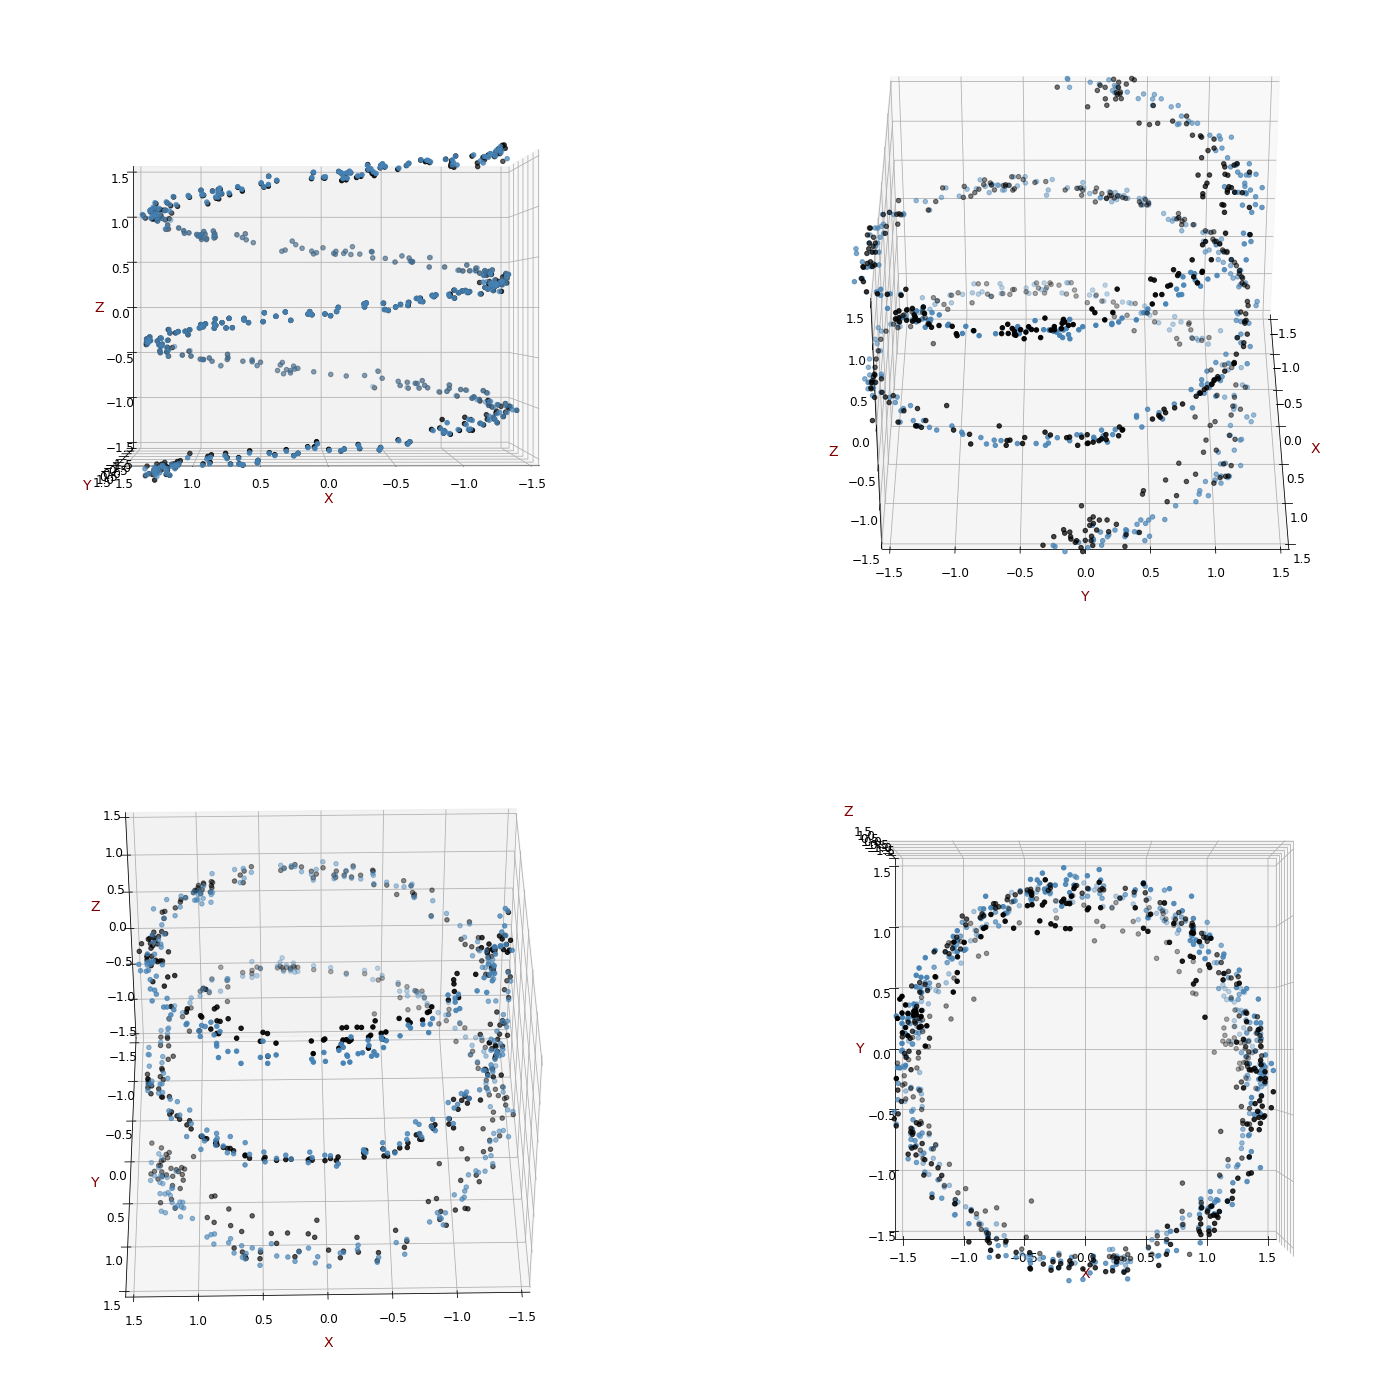

In [75]:
plotscatter3Ddata(X_train_scaled[:, 0], y_pred_scaled, X_train_scaled[:, 1], X_train_scaled[:, 0], y_train_scaled[:, 0], X_train_scaled[:, 1])

# Compute Generalization Error

Compute the generalization error and use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for the model.

In [99]:
from sklearn.metrics import mean_squared_error


y_pred_test_scaled = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred_test_scaled)
generalization_error = round(mse, 4)

print(f"Generalization error (MSE) of {generalization_error}")

4/4 [==============================] - 0s 992us/step
Generalization error (MSE) of 0.0412
